# Employee Attrition

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model as lm, metrics, model_selection as ms, preprocessing, tree, ensemble
from sklearn.pipeline import Pipeline
from sklearn import linear_model as lm
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import lightgbm as lgb

%matplotlib inline

In [153]:
ea = pd.read_csv('employee-attrition.csv')
ea.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 1. EDA

In [154]:
ea.shape

(1470, 35)

1470 rows, 35 columns

In [155]:
ea.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [156]:
# Replace yes, no with 1, 0
ea['Attrition'] = (ea['Attrition'] != 'No').astype(int)
ea.shape

(1470, 35)

In [157]:
ea['Attrition'].unique()

array([1, 0], dtype=int64)

Our target is attrition

In [158]:
ea.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

dataset is clean>>> moving forward to visualisation

In [159]:
# Show the list of all categorical variables and count the values by its categories

for col in ea.select_dtypes(include='object').columns:
    print('=' * 10, col, '=' * 10)
    print(ea[col].value_counts())
    print()

========== BusinessTravel ==========
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

========== Department ==========
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

========== EducationField ==========
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

========== Gender ==========
Male      882
Female    588
Name: Gender, dtype: int64

========== JobRole ==========
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

========== MaritalStatus ==========


In [160]:

ea.select_dtypes(include='object').columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

# Visualisation

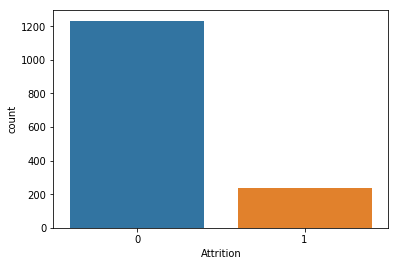

In [161]:
# Create countplot
sns.countplot(x='Attrition',data=ea)

In [162]:
Attrition_rate = ea["Attrition"][ea["Attrition"] == 1]
print ("Attrition Rate = "+str( (Attrition_rate.shape[0] / ea["Attrition"].shape[0]) * 100 ))

Attrition Rate = 16.122448979591837


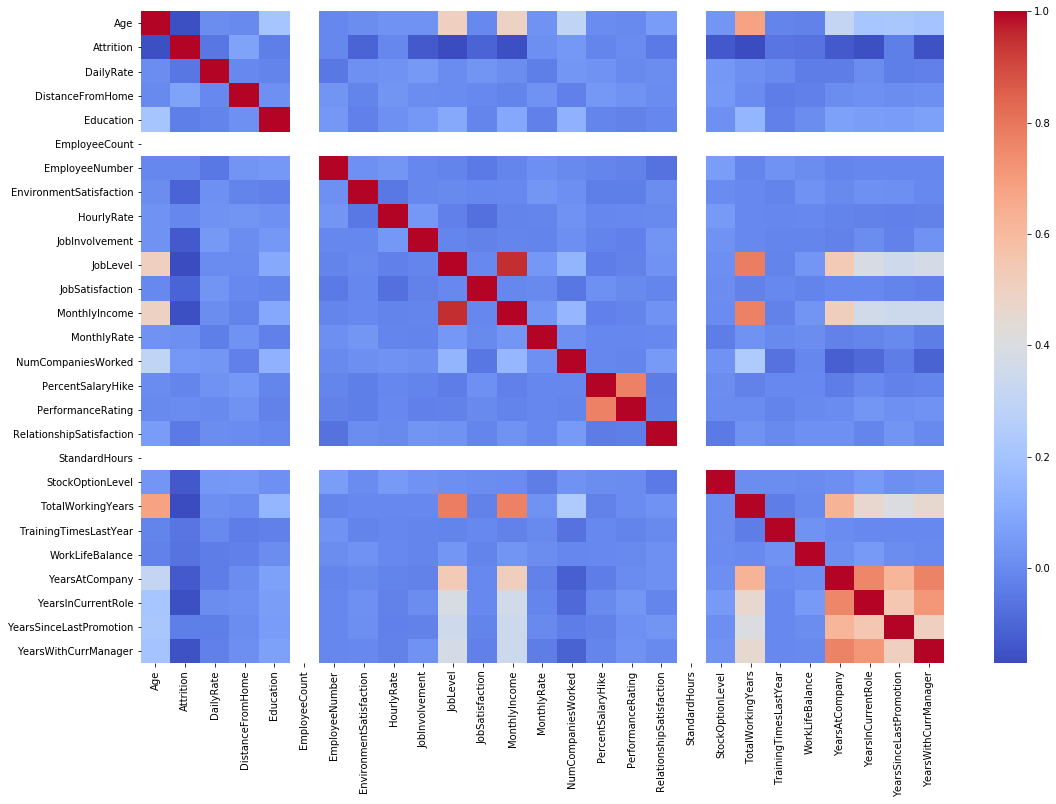

In [163]:
plt.figure(figsize=(18,12))
sns.heatmap(ea.corr(),cmap='coolwarm')

In [164]:
# Categorical Features:
ea.select_dtypes(include='object').columns

categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime']

categorical_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [165]:
Business_Travel = pd.get_dummies(ea.BusinessTravel, drop_first= True)
department = pd.get_dummies(ea.Department, drop_first= True)
educationField = pd.get_dummies(ea.EducationField, drop_first= True)
gender = pd.get_dummies(ea.Gender, drop_first= True)
jobRole = pd.get_dummies(ea.JobRole, drop_first= True)
maritalStatus = pd.get_dummies(ea.MaritalStatus, drop_first= True)
over18 = pd.get_dummies(ea.Over18, drop_first= True)
overTime = pd.get_dummies(ea.OverTime, drop_first= True)

In [166]:
ea.shape

(1470, 35)

In [167]:
ea.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [168]:
ea = pd.concat([ea, Business_Travel, department,educationField,gender,jobRole, maritalStatus,over18,overTime ], axis = 1)    

ea.head(3)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,0,0,0,0,1,0,0,1,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,1,0,0,0,0,0,0,0,1,1


In [169]:
# Create dataframe for the model
ea = ea.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'], axis=1)
ea.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Married,Single,Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,1,2,3,61,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,92,2,...,1,0,0,0,0,0,0,0,1,1


In [170]:
ea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int32
DailyRate                   1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
PercentSalaryHike           1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StandardHours               1

# Prediction models

Prepare the data for modelling

In [171]:
# Prepare data for modelling
X = ea.drop(['Attrition'], axis = 1)
y = ea['Attrition']

In [172]:
#Split train dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Logistic Regression

In [173]:
Logistic_model = lm.LogisticRegression(C=1e50, solver='liblinear')
Logistic_model.fit(X_train, y_train)

LogisticRegression(C=1e+50, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [174]:
# Result of logistic regression

# compute confusion matrix and classification report for log model
predictions = Logistic_model.predict(X_train)

Log_acs=metrics.accuracy_score(y_train, Logistic_model.predict(X_train))
Log_acs

print(confusion_matrix(y_train, predictions))
print ('\n')
print (classification_report(y_train, predictions))
print ('Accuracy:',Log_acs)

[[1093   16]
 [ 128   86]]


              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1109
           1       0.84      0.40      0.54       214

   micro avg       0.89      0.89      0.89      1323
   macro avg       0.87      0.69      0.74      1323
weighted avg       0.89      0.89      0.87      1323

Accuracy: 0.891156462585034


In [175]:
cv = ms.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [176]:
scaled_logreg = Pipeline([
    ('std', preprocessing.StandardScaler()),
    ('reg', lm.LogisticRegression(solver='liblinear'))
])

#Determine 'optimal' value of C by cross-validation using AUC scoring.
gs = ms.GridSearchCV(estimator=scaled_logreg,
                     param_grid={'reg__C': np.logspace(-5, 5, 11)},
                     scoring='roc_auc',
                     cv=cv)
gs.fit(X_train, y_train)

C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 wer

C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype uint8, int64 were all conv

C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype uint8, int64 were all conv

C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype uint8, int64 were all conv

C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype uint8, int64 were all conv

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'reg__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [177]:
gs.best_score_

0.8376319069898828

In [178]:
gs.best_estimator_.named_steps['reg']

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

# Random Forest

In [179]:
# train the random forest with 10 decision trees
RFC_model = RandomForestClassifier(n_estimators = 10, max_depth=5, random_state=42)

In [180]:
# fit the model
RFC_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [181]:
aucs = ms.cross_val_score(RFC_model, X_train, y_train, scoring='roc_auc', cv=cv)
np.mean(aucs)

0.7552506889716193

In [182]:
accuracy_score = ms.cross_val_score(RFC_model, X_train, y_train, scoring='accuracy', cv=cv)
np.mean(accuracy_score)

0.8533725518329867

In [183]:
Classifier_predict = RFC_model.predict(X_train)

In [184]:
print(confusion_matrix(y_train, Classifier_predict))
print ('\n')
print (classification_report(y_train, Classifier_predict))
print ('\n')
print('Accuracy score',np.mean(accuracy_score))

[[1109    0]
 [ 170   44]]


              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1109
           1       1.00      0.21      0.34       214

   micro avg       0.87      0.87      0.87      1323
   macro avg       0.93      0.60      0.63      1323
weighted avg       0.89      0.87      0.83      1323



Accuracy score 0.8533725518329867


In [186]:
RFC_model.feature_importances_~

SyntaxError: invalid syntax (<ipython-input-186-f7d287218957>, line 1)

# Feature Importance

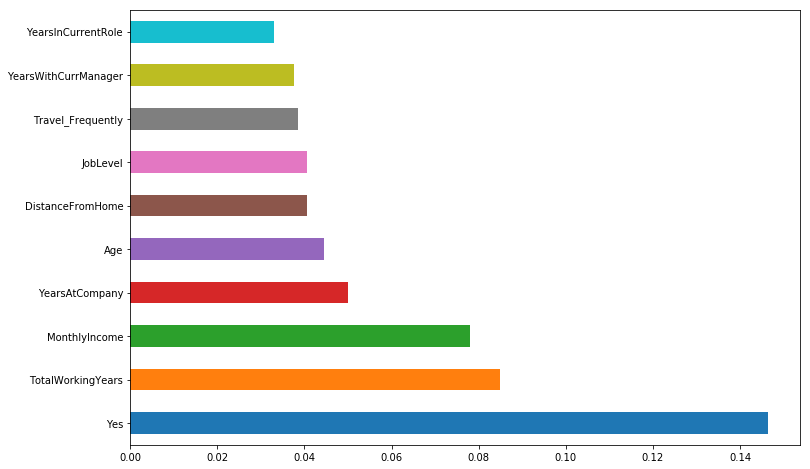

In [187]:
#top 10 features
def plot_importances(ea):
     plt.figure(figsize=(12, 8))

     (pd.Series(RFC_model.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh'))    

     return

plot_importances(RFC_model)

Yes is the most important feature >>> it shows if employee work overtime, they have high attrition rate

In [188]:
# Increase the number of trees

for n_trees in [50, 100,200,300,500]:
    estimator = ensemble.RandomForestClassifier(n_estimators=n_trees, random_state=42)
    aucs = ms.cross_val_score(estimator, X, y, scoring='roc_auc', cv=cv)  
    acs = ms.cross_val_score(estimator, X, y,  scoring='accuracy', cv=cv)
    print('{:>3} trees: mean AUC {:.2%}'.format(n_trees, np.mean(aucs))) 
    print('{:>3} trees: mean Accuracy {:.2%}'.format(n_trees, np.mean(acs)))      

 50 trees: mean AUC 77.26%
 50 trees: mean Accuracy 85.65%
100 trees: mean AUC 78.90%
100 trees: mean Accuracy 85.44%
200 trees: mean AUC 79.55%
200 trees: mean Accuracy 85.31%
300 trees: mean AUC 79.63%
300 trees: mean Accuracy 85.17%
500 trees: mean AUC 79.75%
500 trees: mean Accuracy 85.31%


In [189]:
rfc=RandomForestClassifier(random_state=42)

In [193]:
param_grid = { 
    'n_estimators': [200,300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10,20],
    'criterion' :['gini']
}

In [194]:
# GridSerch CV for Random forest

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 300, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8, 10, 20], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [195]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 200}

In [196]:
# re-train the model using RFC with best params
RFC_model_2 = RandomForestClassifier(n_estimators = 200, 
                                   max_depth=20, 
                                   random_state=42)
RFC_model_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [198]:
Classifier_predict_2 = RFC_model_2.predict(X_train)

In [199]:
print(confusion_matrix(y_train, Classifier_predict_2))
print ('\n')
print (classification_report(y_train, Classifier_predict_2))
print ('\n')
print('Accuracy score',np.mean(accuracy_score))

[[1109    0]
 [   0  214]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1109
           1       1.00      1.00      1.00       214

   micro avg       1.00      1.00      1.00      1323
   macro avg       1.00      1.00      1.00      1323
weighted avg       1.00      1.00      1.00      1323



Accuracy score 0.8533725518329867


# Gradient tree boosting model

In [111]:
pipeline = Pipeline([
    ('std', StandardScaler()), 
    ('GBC', ensemble.GradientBoostingClassifier())
])
pipeline.steps

[('std', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('GBC', GradientBoostingClassifier(criterion='friedman_mse', init=None,
                learning_rate=0.1, loss='deviance', max_depth=3,
                max_features=None, max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=100,
                n_iter_no_change=None, presort='auto', random_state=None,
                subsample=1.0, tol=0.0001, validation_fraction=0.1,
                verbose=0, warm_start=False))]

In [112]:
gbt1 = ensemble.GradientBoostingClassifier(n_estimators=10, max_depth=5 ,random_state=42)
gbt1.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [113]:
aucs = ms.cross_val_score(gbt1, X, y, scoring='roc_auc', cv=cv)
np.mean(aucs)

0.7501497952947915

In [114]:
for n_trees in [50, 100,200,300,500]:
    estimator = ensemble.GradientBoostingClassifier(n_estimators=n_trees, random_state=42)
    aucs = ms.cross_val_score(estimator, X, y,  scoring='roc_auc', cv=cv)
    acs = ms.cross_val_score(estimator, X, y,  scoring='accuracy', cv=cv)
    print('{:>3} trees: mean AUC {:.2%}'.format(n_trees, np.mean(aucs)))    
    print('{:>3} trees: mean Accuracy {:.2%}'.format(n_trees, np.mean(acs)))

 50 trees: mean AUC 78.41%
 50 trees: mean Accuracy 86.67%
100 trees: mean AUC 78.58%
100 trees: mean Accuracy 86.80%
200 trees: mean AUC 79.52%
200 trees: mean Accuracy 86.33%
300 trees: mean AUC 79.81%
300 trees: mean Accuracy 86.80%
500 trees: mean AUC 79.77%
500 trees: mean Accuracy 86.26%


In [116]:
hyperparameters = {'max_depth':[20, 40],
                   'n_estimators':[100, 200,300,400,500]}
                #'learning_rate':list(np.arange(0.01,1.0,0.01))}

model_to_tune = ensemble.GradientBoostingClassifier(learning_rate=0.01,
                                                    n_estimators=500, 
                                                    min_samples_split=2, 
                                                    min_samples_leaf=1, 
                                                    subsample=1,
                                                    max_features='sqrt', 
                                                    random_state=42)

model_gscv = ms.GridSearchCV(estimator = model_to_tune, 
            param_grid = hyperparameters, 
            scoring='accuracy',
            n_jobs=4,
            iid=False, 
            cv=2,
            verbose=3)

#Run GSCV on model_to_tune
model_gscv.fit(X_train,y_train)

#Get best parameters
model_gscv.cv_results_, model_gscv.best_params_, model_gscv.best_score_

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   17.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   17.5s finished
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Phoenix\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train

({'mean_fit_time': array([0.83555961, 1.85962296, 2.94186699, 4.17682052, 5.31750107,
         1.09270287, 2.02842653, 3.33404529, 4.40683329, 4.87745512]),
  'std_fit_time': array([0.00286055, 0.00250363, 0.00091374, 0.05425501, 0.29776573,
         0.03684092, 0.04757798, 0.01200354, 0.11932099, 0.13935268]),
  'mean_score_time': array([0.01396143, 0.02000022, 0.03765357, 0.0488503 , 0.05643797,
         0.01256144, 0.02329707, 0.0384953 , 0.0377667 , 0.05602443]),
  'std_score_time': array([2.00092793e-03, 2.38418579e-07, 2.34830379e-03, 3.68571281e-03,
         6.23226166e-04, 4.99129295e-04, 8.51154327e-05, 2.77662277e-03,
         9.04512405e-03, 3.98695469e-03]),
  'param_max_depth': masked_array(data=[20, 20, 20, 20, 20, 40, 40, 40, 40, 40],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'param_n_estimators': masked_array(data=[100, 200, 300, 400, 500, 100, 

# Final  model

In [117]:
# retrain the model with max_depth:40, trees: 500

gbt2 = ensemble.GradientBoostingClassifier(
                                           n_estimators=500, 
                                           max_depth=40,
                                           random_state=42)
gbt2.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=40,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [119]:

aucs = ms.cross_val_score(gbt2, X, y, scoring='roc_auc', cv=cv)
np.mean(aucs)

0.7182421938193453

In [120]:
acc = ms.cross_val_score(gbt2, X, y, scoring='accuracy', cv=cv)
np.mean(acc)

0.8034157081586611

In [127]:
#Top 10 features
all_features = pd.DataFrame(sorted(zip(model_gscv.best_estimator_.feature_importances_,X_train.columns), reverse = True),columns=['Ranking','Feature'])
top_10_features = list(all_features['Feature'][0:10])
top_10_features

['MonthlyIncome',
 'Yes',
 'Age',
 'DailyRate',
 'EmployeeNumber',
 'MonthlyRate',
 'TotalWorkingYears',
 'HourlyRate',
 'DistanceFromHome',
 'YearsAtCompany']

In [129]:
# New model with top 10 features.

# Prepare data for modelling
X = ea[top_10_features]
y = ea['Attrition']

#Split train dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#Cross validation
cv = ms.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [130]:
X_train.head()

,MonthlyIncome,Yes,Age,DailyRate,EmployeeNumber,MonthlyRate,TotalWorkingYears,HourlyRate,DistanceFromHome,YearsAtCompany
915,2625,0,21,251,1279,25308,2,45,10,2
101,2956,0,32,827,134,15178,1,71,1,1
107,5744,1,25,240,142,26959,6,46,5,6
306,5484,0,32,906,420,16985,13,91,7,13
1031,10096,0,46,377,1457,15986,28,52,9,7


In [131]:
gbt3 = ensemble.GradientBoostingClassifier(n_estimators=10, max_depth=5 ,random_state=42)
gbt3.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [134]:
aucs = ms.cross_val_score(gbt3, X, y, scoring='roc_auc', cv=cv)
np.mean(aucs)

0.70963380318186

In [138]:
for n_trees in [50, 100,200,300,500]:
    estimator = ensemble.GradientBoostingClassifier(n_estimators=n_trees,max_depth=40, random_state=42)
    aucs = ms.cross_val_score(estimator, X, y,  scoring='roc_auc', cv=cv)
    acs = ms.cross_val_score(estimator, X, y,  scoring='accuracy', cv=cv)
    print('{:>3} trees: mean AUC {:.2%}'.format(n_trees, np.mean(aucs)))    
    print('{:>3} trees: mean Accuracy {:.2%}'.format(n_trees, np.mean(acs)))

 50 trees: mean AUC 63.12%
 50 trees: mean Accuracy 77.34%
100 trees: mean AUC 67.94%
100 trees: mean Accuracy 77.81%
200 trees: mean AUC 67.94%
200 trees: mean Accuracy 77.81%
300 trees: mean AUC 67.94%
300 trees: mean Accuracy 77.81%
500 trees: mean AUC 67.94%
500 trees: mean Accuracy 77.81%


After selecting top 10 features, no changes to AUC and Accuracy if we increase the trees